# Projeto: Regressão com Rede Neural (California Housing)

## 1. Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

## 2. Carregamento e visualização dos dados

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Amostra dos dados:")
print(X.head())
print("\nTarget (mediana do valor das casas):")
print(y.head())

Amostra dos dados:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (mediana do valor das casas):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


## 3. Pré-processamento

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonamento dos atributos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Construção do modelo MLP

In [5]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # saída contínua
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Treinamento do modelo

In [6]:
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.9435 - mae: 0.9251 - val_loss: 0.4917 - val_mae: 0.4965
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4442 - mae: 0.4773 - val_loss: 0.4270 - val_mae: 0.4533
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3795 - mae: 0.4357 - val_loss: 0.4126 - val_mae: 0.4719
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3672 - mae: 0.4338 - val_loss: 0.4039 - val_mae: 0.4650
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541 - mae: 0.4236 - val_loss: 0.3894 - val_mae: 0.4479
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3422 - mae: 0.4134 - val_loss: 0.3636 - val_mae: 0.4242
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3475 - mae: 0.4097 - val_loss: 0.3613 - val_mae: 0.4229
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3350 - mae: 0.4043 - val_loss: 0.3628 - val_mae: 0.4074
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - lo

## 6. Avaliação do modelo

In [7]:
predictions = model.predict(X_test_scaled).flatten()
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"\nErro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Erro Absoluto Médio (MAE): 0.36
Erro Quadrático Médio (MSE): 0.29
Raiz do Erro Quadrático Médio (RMSE): 0.54


## 7. Gráfico: Valores reais vs. preditos

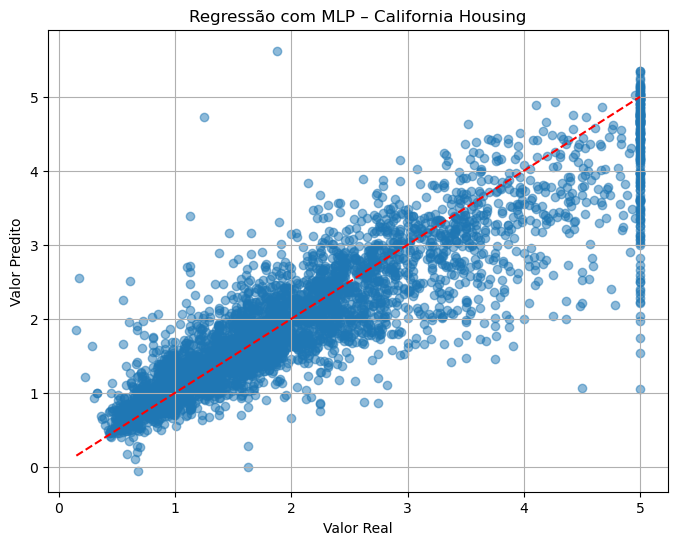

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Regressão com MLP – California Housing")
plt.grid(True)
plt.show()

## 8. Conclusão
"""
O modelo de regressão com MLP conseguiu aprender padrões do conjunto California Housing.

- O RMSE final mostra a média dos desvios entre os valores reais e preditos.
- O gráfico de dispersão indica se a rede conseguiu aproximar a reta ideal y = x.

Próximos passos:
- Testar outras arquiteturas de rede
- Aplicar técnicas de regularização
- Tentar normalização dos targets (y)
"""